# Northpole example

In this tutorial, we will reproduce the results published in [Paine et al.](https://link.springer.com/article/10.1007/s11222-017-9756-4) and estimate the historical position of the northpole.

The dataset contains estimates of the position of the Earth’s historic magnetic pole calculated from 33 different sites in Tasmania ([Schmidt 1976](https://academic.oup.com/gji/article/47/2/285/584461)).

In [1]:
import spherical_stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

The dataset comes with the package and can directly be loaded. Note that numpy arrays holding vectors have to be provided in the shape ``(n, 3)`` all over ``spherical_stats``.

In [2]:
data = spherical_stats.load_northpole()
data.shape

(33, 3)

Let's have a look at that data. For quickly plotting a sphere, the function ``sphere`` comes in handy. Note that by default, the individual patches of the spherical surface have the same surface area: that's why the patches become longer towards the poles of the sphere.

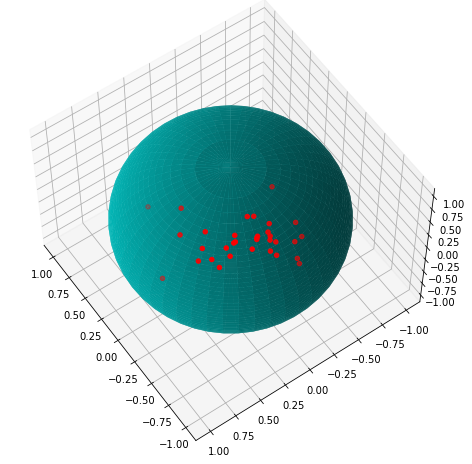

In [3]:
N_GRID = 50

x, y, z = spherical_stats.sphere(n_grid = N_GRID)

plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.9, linewidth=1)

ax.scatter(data[:, 0], data[:, 1], data[:, 2], color="r",s=20)
ax.view_init(57, 145)
plt.show()

These data are clearly not uniformly distributed. Which model can be used to describe them? ``spherical_stats`` contains two distributions for spherical data: the elliptically symmetrical angular gaussian (``esag``) distribution for directional data like these and the angular central gaussian distribution (``acg``) for axial data. In spherical statistics, axial data refer to symmetric around the center of the sphere. 

The usage of the distributions is exactly like in scipy. Distributions are classes with the following methods:

- ``fit(data)`` for fitting the distribution to data
- ``pdf(x)`` to calculate the PDF of a set of vectors ``x``
- ``rvs(n)`` to generate ``n`` samples of the distribution

Let's fit the ESAG distribution and add some verbosity for additional information.

In [4]:
esag = spherical_stats.ESAG()
esag.fit(data, verbose = True)

C:\ProgramData\Anaconda3\lib\site-packages\spherical_stats\_esag.py:178: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  probabilities = _pdf(samples, params)


ESAG Fit Summary 
Maximum Likelihood parameters: 
mu=[-2.33458151  1.10665115  3.3417471 ], gammas=[ 0.16959775 -0.78039362]
Principal vector: [-0.55269379  0.26199094  0.79113231]
Minimized Log Likelihood: -2.685455202029422
Optimization iterations: 17
Elapsed fitting time:      3.525


We get the same results as the authors of the ESAG distribution. The elapsed fitting time includes the just-in-time compilation by numba. Fortunately numba caches compiled functions, so another run will be far faster.

In [5]:
esag.fit(data, verbose = True)

ESAG Fit Summary 
Maximum Likelihood parameters: 
mu=[-2.33458151  1.10665115  3.3417471 ], gammas=[ 0.16959775 -0.78039362]
Principal vector: [-0.55269379  0.26199094  0.79113231]
Minimized Log Likelihood: -2.685455202029422
Optimization iterations: 17
Elapsed fitting time:      0.007


We see the expected massive speed improvement. 

Finally, let's plot the distribution over the sphere together with the measurement data.

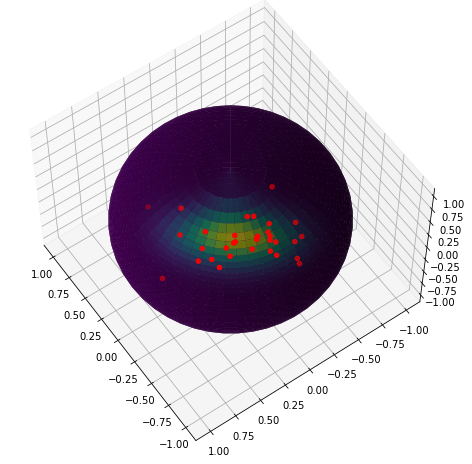

In [6]:
pdf = spherical_stats.evaluate_on_sphere(esag.pdf, n_grid = N_GRID)

norm = matplotlib.colors.Normalize(vmin=pdf.min(), vmax=pdf.max())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, facecolors=plt.cm.viridis(norm(pdf)), linewidth=0)

ax.scatter(data[:, 0], data[:, 1], data[:, 2], color="r",s=20)
ax.view_init(57, 145)
plt.show()